In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

import sympy

import goto.trajbang.saturated_filter as flt
import goto.trajbang.trajbang3 as tb3

Xref, Xcom, s, e, w = sympy.symbols('X_ref X_com s epsilon omega_0')

Partant de l'équation canonique d'un filtre d'ordre 2 :

$$ \frac{X_\mathit{ref}}{X_\mathit{com}} = \frac{1}{1 + \frac{2 \varepsilon}{\omega_0}s + \frac{s^2}{\omega_0^2}}$$

Avec :

* $\varepsilon$ l'atténuation
* $\omega_0$ la pulsation de coupure

Que l'on peut réécrire :
$$ X_\mathit{ref} = \frac{\omega_0^2}{s^2} \left ( X_\mathit{com} - X_\mathit{ref} - \frac{2 \varepsilon}{\omega_0}s X_\mathit{ref} \right ) $$

In [2]:
Xref = Xcom / (1 + (2*e*s)/(w) + (s/w)**2)

In [3]:
epsilon = 0.8

f0 = flt.Filter2(epsilon, 10.0)
f1 = flt.Filter2_sat(epsilon, 10.0, 3.0, 60.0)
f2 = flt.Filter2_sat(epsilon, 10.0, 3.0, 60.0)
f3 = flt.Filter2_sat(epsilon, 10.0, 3.0, 60.0)

Filter2(0.8, 10.0)
Filter2_sat(0.8, 10.0, 3.0, 60.0)
Filter2_sat(0.8, 10.0, 3.0, 60.0)
Filter2_sat(0.8, 10.0, 3.0, 60.0)


In [4]:
x_lst = [0.0,] * 50 + [1.0,] * 3000
y0_lst = [f0.step(x) for x in x_lst]
y1_lst = [f1.step(x) for x in x_lst]
y2_lst = [f2.step(x) for x in y1_lst]
y3_lst = [f3.step(x) for x in y2_lst]

<IPython.core.display.Javascript object>


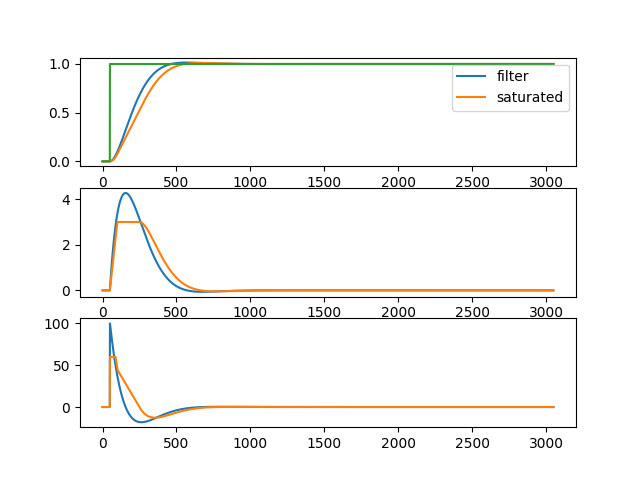

In [5]:
plt.figure()
plt.subplot(3, 1, 1)
plt.plot(y0_lst, label="filter")
plt.plot(y1_lst, label="saturated")
# plt.plot(y2_lst, label="double")
plt.plot(x_lst)
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(f0.hist['xref1'])
plt.plot(f1.hist['xref1'])
# plt.plot(f3.hist['xref1'])
plt.subplot(3, 1, 3)
plt.plot(f0.hist['xref2'])
plt.plot(f1.hist['xref2'])
# plt.plot(f3.hist['xref2'])
plt.show()

<IPython.core.display.Javascript object>


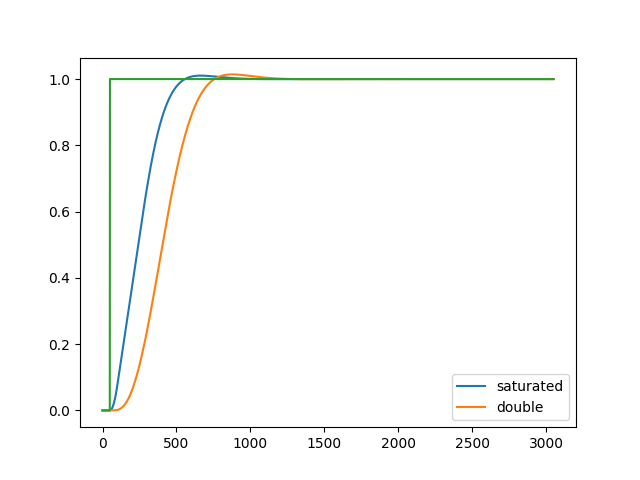

In [6]:
plt.figure()
plt.plot(y1_lst, label="saturated")
plt.plot(y2_lst, label="double")
plt.plot(x_lst)
plt.legend()
plt.show()

0.0	0.0
0.0	0.0
0.0	0.0
0.0	0.0
0.0	0.0
1.0	0.05
0.0	0.2833333333333334
-1.0	0.05
Filter2_sat(0.7, 10.0, 3.0, 60.0)


<IPython.core.display.Javascript object>


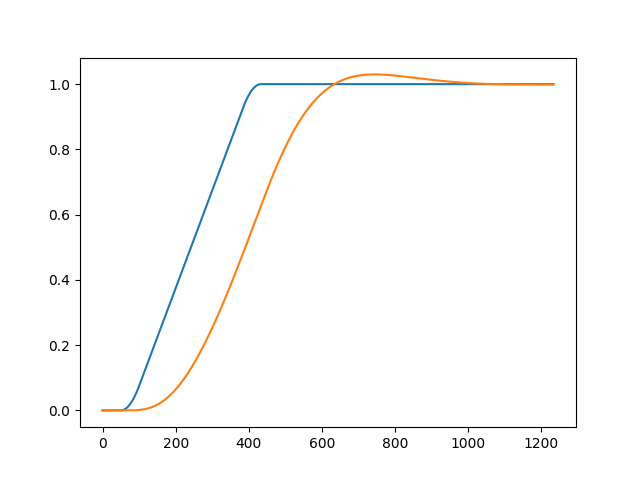

In [7]:
t0 = tb3.TrajBang3(60.0, 3.0)
t0.compute(0.0, 0.0, 0.0, 1.0)
m = int(t0.poly['T'][-1] * 1000) + 1
t0_lst = [0.0,] * 50 + [t0.get_at_time(x * 0.001)[2] for x in range(m)] + [1.0,] * 800

f4 = flt.Filter2_sat(0.7, 10.0, 3.0, 60.0)
y4_lst = [f4.step(x) for x in t0_lst]

plt.figure()
plt.plot(t0_lst)
plt.plot(y4_lst)
plt.show()